In [1]:
import pandas as pd
import geopandas as gpd
import json
#import simplejson
from matplotlib import pyplot as plt
import numpy as np
import datetime
import csv
from shapely.geometry import Point
#import yelp
#import json_to_csv_converter
%matplotlib inline
from __future__ import print_function

try:
    from urllib import urlretrieve as urlretrieve
except ImportError:
    from urllib.request import urlretrieve as urlretrieve

In [2]:
link = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-06.csv"
data = pd.read_csv(link)

In [3]:
data.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-06-01 00:15:40,2018-06-01 00:16:46,1,0.00,1,N,145,145,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30
1,1,2018-06-01 00:04:18,2018-06-01 00:09:18,1,1.00,1,N,230,161,1,5.5,0.5,0.5,1.35,0.0,0.3,8.15
2,1,2018-06-01 00:14:39,2018-06-01 00:29:46,1,3.30,1,N,100,263,2,13.0,0.5,0.5,0.00,0.0,0.3,14.30
3,1,2018-06-01 00:51:25,2018-06-01 00:51:29,3,0.00,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80
4,1,2018-06-01 00:55:06,2018-06-01 00:55:10,1,0.00,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80
5,1,2018-06-01 00:09:00,2018-06-01 00:24:01,1,2.00,1,N,161,234,1,11.5,0.5,0.5,2.55,0.0,0.3,15.35
6,1,2018-06-01 00:02:33,2018-06-01 00:13:01,2,1.50,1,N,163,233,1,8.5,0.5,0.5,1.95,0.0,0.3,11.75
7,1,2018-06-01 00:13:23,2018-06-01 00:16:52,1,0.70,1,N,186,246,1,5.0,0.5,0.5,1.85,0.0,0.3,8.15
8,1,2018-06-01 00:24:29,2018-06-01 01:08:43,1,5.70,1,N,230,179,2,22.0,0.5,0.5,0.00,0.0,0.3,23.30
9,2,2018-06-01 00:17:01,2018-06-01 00:23:16,1,0.85,1,N,179,223,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30


In [4]:
data.shape

(8713831, 17)

In [5]:
type(data['trip_distance'].values[0])

numpy.float64

In [6]:
data = data[(data.trip_distance > float(0))]

In [7]:
data.shape

(8653818, 17)

In [8]:
type(data['tpep_pickup_datetime'].values[0])

str

In [9]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

In [10]:
data.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
1,1,2018-06-01 00:04:18,2018-06-01 00:09:18,1,1.0,1,N,230,161,1,5.5,0.5,0.5,1.35,0.0,0.3,8.15
2,1,2018-06-01 00:14:39,2018-06-01 00:29:46,1,3.3,1,N,100,263,2,13.0,0.5,0.5,0.00,0.0,0.3,14.30
5,1,2018-06-01 00:09:00,2018-06-01 00:24:01,1,2.0,1,N,161,234,1,11.5,0.5,0.5,2.55,0.0,0.3,15.35


In [11]:
data['PUTime'] = data['tpep_pickup_datetime'].dt.time
data.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,PUTime
1,1,2018-06-01 00:04:18,2018-06-01 00:09:18,1,1.0,1,N,230,161,1,5.5,0.5,0.5,1.35,0.0,0.3,8.15,00:04:18
2,1,2018-06-01 00:14:39,2018-06-01 00:29:46,1,3.3,1,N,100,263,2,13.0,0.5,0.5,0.00,0.0,0.3,14.30,00:14:39
5,1,2018-06-01 00:09:00,2018-06-01 00:24:01,1,2.0,1,N,161,234,1,11.5,0.5,0.5,2.55,0.0,0.3,15.35,00:09:00


In [12]:
start = pd.to_datetime('20:00:00').time()
end = pd.to_datetime('04:00:00').time()
print(start, end)
Night = [start, end]
Night

20:00:00 04:00:00


[datetime.time(20, 0), datetime.time(4, 0)]

In [13]:
x = pd.to_datetime('00:01:00').time()
if x < start:
    print(1)

1


In [14]:
data1 = data[(data.PUTime > start)]

In [15]:
data1.shape

(1851583, 18)

In [16]:
data2 = data[(data.PUTime < end)]
data2.shape

(724963, 18)

In [17]:
frames = [data1, data2]
dataNighTDec = pd.concat(frames)
dataNighTDec.shape

(2576546, 18)

In [18]:
dataNighTDec.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,PUTime
136,2,2018-05-31 23:59:23,2018-06-01 00:09:01,3,1.64,1,N,234,148,1,8.5,0.5,0.5,1.96,0.0,0.3,11.76,23:59:23
230,2,2018-05-31 23:58:09,2018-06-01 00:12:55,6,3.17,1,N,142,262,1,13.0,0.5,0.5,1.50,0.0,0.3,15.80,23:58:09
257,2,2018-05-31 23:59:25,2018-06-01 00:02:26,2,1.21,1,N,231,249,1,5.5,0.5,0.5,1.70,0.0,0.3,8.50,23:59:25
274,2,2018-05-31 23:58:54,2018-06-01 00:18:13,2,5.71,1,N,112,170,2,19.5,0.5,0.5,0.00,0.0,0.3,20.80,23:58:54
288,2,2018-05-31 23:59:46,2018-06-01 00:28:45,1,5.80,1,N,234,145,1,23.0,0.5,0.5,4.86,0.0,0.3,29.16,23:59:46
296,2,2018-05-31 23:59:11,2018-06-01 00:27:28,1,7.30,1,N,142,243,1,26.5,0.5,0.5,5.56,0.0,0.3,33.36,23:59:11
313,2,2018-05-31 23:57:53,2018-06-01 00:02:39,1,0.72,1,N,164,186,1,5.0,0.5,0.5,1.26,0.0,0.3,7.56,23:57:53
510,2,2018-05-31 23:55:59,2018-06-01 00:08:04,1,1.76,1,N,162,48,1,9.5,0.5,0.5,2.16,0.0,0.3,12.96,23:55:59
632,2,2018-05-31 23:59:29,2018-06-01 00:10:48,6,2.34,1,N,48,125,1,10.0,0.5,0.5,2.82,0.0,0.3,14.12,23:59:29
726,2,2018-05-31 23:58:20,2018-06-01 00:13:34,1,2.99,1,N,164,87,1,12.5,0.5,0.5,1.00,0.0,0.3,14.80,23:58:20


In [19]:
dataNighTDec = dataNighTDec.groupby(by='PULocationID').count()

In [20]:
dataNighTDec['PULocationID'] = dataNighTDec.index
dataNighTDec.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,PUTime,PULocationID
PULocationID,,,,,,,,,,,,,,,,,,
1,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,1
3,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,3
4,7639,7639,7639,7639,7639,7639,7639,7639,7639,7639,7639,7639,7639,7639,7639,7639,7639,4


In [21]:
dataNighTDec.reset_index(drop=True, inplace=True)

In [25]:
shp = gpd.read_file('taxi_zones.shp')
shp.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ..."


In [26]:
shp.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ..."


In [27]:
shp.shape

(263, 7)

In [28]:
shpMan = shp[(shp.borough == 'Manhattan')]
shpMan.shape

(69, 7)

In [29]:
shpMan['coords'] = shpMan['geometry'].apply(lambda x: x.representative_point().coords[:])
shpMan['coords'] = [coords[0] for coords in shpMan['coords']]
shpMan.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,coords
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,...","(990618.795051066, 203105.53231811523)"
11,12,0.036661,0.000042,Battery Park,12,Manhattan,"POLYGON ((979908.771901235 196066.5651661754, ...","(979954.9890335621, 195212.32189939916)"
12,13,0.050281,0.000149,Battery Park City,13,Manhattan,"POLYGON ((980801.3095727563 201248.8694928288,...","(979781.1033032676, 198536.38051874936)"
23,24,0.047000,0.000061,Bloomingdale,24,Manhattan,"POLYGON ((995453.1139255464 230274.2667761594,...","(993782.5747503315, 231481.0488781333)"
40,41,0.052793,0.000143,Central Harlem,41,Manhattan,"POLYGON ((998716.9128961712 234240.3971749842,...","(997520.5888832721, 232274.16256850213)"


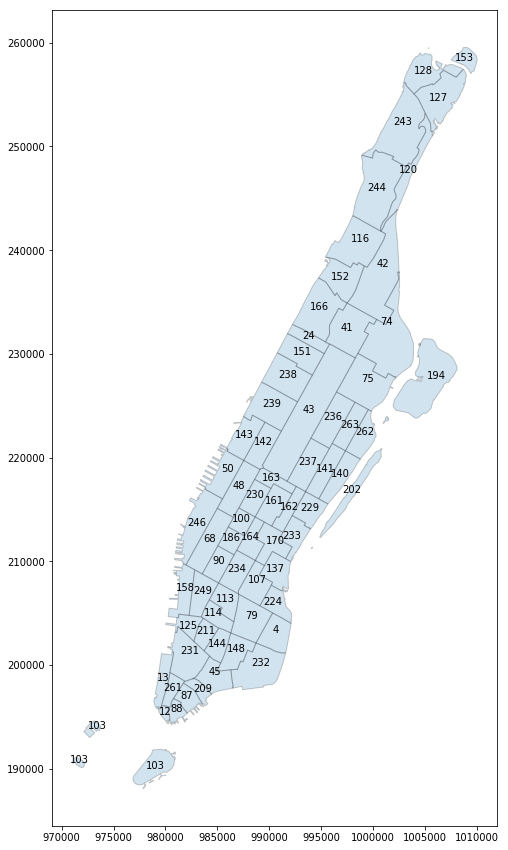

In [30]:
shpMan.plot(figsize=(15, 15), edgecolor='black', alpha=0.2)
for idx, row in shpMan.iterrows():
    plt.annotate(s=row['LocationID'], xy=row['coords'], color='Black', horizontalalignment='center', size=10)

In [74]:
dataMan = dataNighTDec.merge(shpMan, left_on='PULocationID', right_on='LocationID')
dataMan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,DOLocationID,payment_type,fare_amount,...,PUTime,PULocationID,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,coords
0,7639,7639,7639,7639,7639,7639,7639,7639,7639,7639,...,7639,4,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,...","(990618.795051066, 203105.53231811523)"
1,903,903,903,903,903,903,903,903,903,903,...,903,12,12,0.036661,0.000042,Battery Park,12,Manhattan,"POLYGON ((979908.771901235 196066.5651661754, ...","(979954.9890335621, 195212.32189939916)"
2,18397,18397,18397,18397,18397,18397,18397,18397,18397,18397,...,18397,13,13,0.050281,0.000149,Battery Park City,13,Manhattan,"POLYGON ((980801.3095727563 201248.8694928288,...","(979781.1033032676, 198536.38051874936)"
3,5445,5445,5445,5445,5445,5445,5445,5445,5445,5445,...,5445,24,24,0.047000,0.000061,Bloomingdale,24,Manhattan,"POLYGON ((995453.1139255464 230274.2667761594,...","(993782.5747503315, 231481.0488781333)"
4,10257,10257,10257,10257,10257,10257,10257,10257,10257,10257,...,10257,41,41,0.052793,0.000143,Central Harlem,41,Manhattan,"POLYGON ((998716.9128961712 234240.3971749842,...","(997520.5888832721, 232274.16256850213)"


In [75]:
dataMan.shape

(66, 26)

In [76]:
dataMan.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'PUTime', 'PULocationID', 'OBJECTID', 'Shape_Leng', 'Shape_Area',
       'zone', 'LocationID', 'borough', 'geometry', 'coords'],
      dtype='object')

In [77]:
dataMan = dataMan[['PULocationID', 'Shape_Leng', 'Shape_Area', 'geometry', 'coords', 'PUTime','passenger_count']]
dataMan.head()

,PULocationID,Shape_Leng,Shape_Area,geometry,coords,PUTime,passenger_count
0,4,0.043567,0.000112,"POLYGON ((992073.4667968601 203714.0759887695,...","(990618.795051066, 203105.53231811523)",7639,7639
1,12,0.036661,0.000042,"POLYGON ((979908.771901235 196066.5651661754, ...","(979954.9890335621, 195212.32189939916)",903,903
2,13,0.050281,0.000149,"POLYGON ((980801.3095727563 201248.8694928288,...","(979781.1033032676, 198536.38051874936)",18397,18397
3,24,0.047000,0.000061,"POLYGON ((995453.1139255464 230274.2667761594,...","(993782.5747503315, 231481.0488781333)",5445,5445
4,41,0.052793,0.000143,"POLYGON ((998716.9128961712 234240.3971749842,...","(997520.5888832721, 232274.16256850213)",10257,10257


In [78]:
type(dataMan)

pandas.core.frame.DataFrame

In [79]:
crs = {'init': 'epsg:4326'}
dataMan = gpd.GeoDataFrame(dataMan, crs=crs, geometry='geometry')

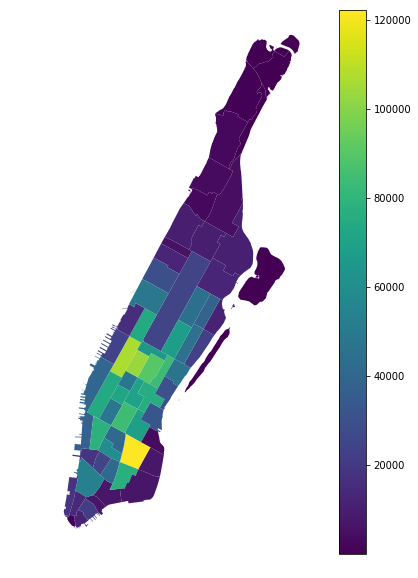

In [80]:
ax = dataMan.plot(column='PUTime', figsize=(10,10), k=10, legend=True)
ax.set_axis_off()

Number of yellow Taxi trips by area in Manhattan during Night in December

In [81]:
rest = pd.read_csv('lateNightRest.csv')
rest.head()

,restaurant_alias,restaurant_categories_0_alias,restaurant_categories_0_title,restaurant_categories_1_alias,restaurant_categories_1_title,restaurant_categories_2_alias,restaurant_categories_2_title,restaurant_coordinates_latitude,restaurant_coordinates_longitude,restaurant_display_phone,...,restaurant_location_zip_code,restaurant_name,restaurant_phone,restaurant_price,restaurant_rating,restaurant_review_count,restaurant_transactions_0,restaurant_transactions_1,restaurant_transactions_2,restaurant_url
0,the-halal-guys-new-york-2,foodstands,Food Stands,mideastern,Middle Eastern,halal,Halal,40.761756,-73.979230,NaN,...,10019.0,The Halal Guys,NaN,$,4.0,9029,NaN,NaN,NaN,https://www.yelp.com/biz/the-halal-guys-new-yo...
1,late-nite-hackensack-pizza-and-steak-hackensack,pizza,Pizza,tradamerican,American (Traditional),italian,Italian,40.900701,-74.041477,(201) 342-5283,...,7601.0,Late Nite Hackensack Pizza and Steak,1.201343e+10,$$,4.0,78,NaN,NaN,NaN,https://www.yelp.com/biz/late-nite-hackensack-...
2,buddakan-new-york,chinese,Chinese,bars,Bars,asianfusion,Asian Fusion,40.742276,-74.004800,(212) 989-6699,...,10011.0,Buddakan,1.212990e+10,$$$,4.0,3599,pickup,delivery,NaN,https://www.yelp.com/biz/buddakan-new-york?adj...
3,turntable-chicken-jazz-new-york-2,chicken_wings,Chicken Wings,korean,Korean,NaN,NaN,40.748280,-73.986490,(212) 714-9700,...,10001.0,Turntable Chicken Jazz,1.212715e+10,$$,4.0,1793,NaN,NaN,NaN,https://www.yelp.com/biz/turntable-chicken-jaz...
4,the-meatball-shop-new-york,italian,Italian,tradamerican,American (Traditional),NaN,NaN,40.721496,-73.988736,(212) 982-8895,...,10002.0,The Meatball Shop,1.212983e+10,$$,4.0,2684,pickup,delivery,NaN,https://www.yelp.com/biz/the-meatball-shop-new...


In [84]:
rest1 = pd.read_csv('50csvOct.csv')
rest1.head()

,Unnamed: 0,restaurant_name,restaurant_location_state,restaurant_location_zip_code,restaurant_location_city,restaurant_coordinates_latitude,restaurant_coordinates_longitude,restaurant_rating,restaurant_price,lonlat,geometry,hashtag,hashtags,restaurant,hashtags_june
0,0,The Halal Guys,NY,10019.0,New York,40.761756,-73.979230,4.0,$,"(-73.9792299271, -73.9792299271)",POINT (-73.97922992709999 40.7617559583),TheHalalGuys,thehalalguys,thehalalguys,301
1,1,Buddakan,NY,10011.0,New York,40.742276,-74.004800,4.0,$$$,"(-74.0048000962, -74.0048000962)",POINT (-74.0048000962 40.7422762672),Buddakan,buddakan,buddakan,22
2,2,Turntable Chicken Jazz,NY,10001.0,New York,40.748280,-73.986490,4.0,$$,"(-73.98649, -73.98649)",POINT (-73.98649 40.74828),TurntableChickenJazz,turntablechickenjazz,turntablechickenjazz,0
3,3,The Meatball Shop,NY,10002.0,New York,40.721496,-73.988736,4.0,$$,"(-73.9887357, -73.9887357)",POINT (-73.98873570000001 40.7214961),TheMeatballShop,themeatballshop,themeatballshop,166
4,4,Great NY Noodle Town,NY,10013.0,New York,40.715036,-73.997117,3.5,$,"(-73.9971172437, -73.9971172437)",POINT (-73.9971172437 40.7150363829),GreatNYNoodleTown,greatnynoodletown,greatnynoodletown,1


In [85]:
rest1.columns

Index(['Unnamed: 0', 'restaurant_name', 'restaurant_location_state',
       'restaurant_location_zip_code', 'restaurant_location_city',
       'restaurant_coordinates_latitude', 'restaurant_coordinates_longitude',
       'restaurant_rating', 'restaurant_price', 'lonlat', 'geometry',
       'hashtag', 'hashtags', 'restaurant', 'hashtags_june'],
      dtype='object')

In [82]:
rest.columns

Index(['restaurant_alias', 'restaurant_categories_0_alias',
       'restaurant_categories_0_title', 'restaurant_categories_1_alias',
       'restaurant_categories_1_title', 'restaurant_categories_2_alias',
       'restaurant_categories_2_title', 'restaurant_coordinates_latitude',
       'restaurant_coordinates_longitude', 'restaurant_display_phone',
       'restaurant_distance', 'restaurant_id', 'restaurant_image_url',
       'restaurant_is_closed', 'restaurant_location_address1',
       'restaurant_location_address2', 'restaurant_location_address3',
       'restaurant_location_city', 'restaurant_location_country',
       'restaurant_location_display_address_0',
       'restaurant_location_display_address_1',
       'restaurant_location_display_address_2',
       'restaurant_location_display_address_3', 'restaurant_location_state',
       'restaurant_location_zip_code', 'restaurant_name', 'restaurant_phone',
       'restaurant_price', 'restaurant_rating', 'restaurant_review_count',
   

In [116]:
rest1 = rest1[['restaurant_name', 'restaurant_location_state', 'restaurant_location_zip_code', 'restaurant_location_city',
             'restaurant_coordinates_latitude', 'restaurant_coordinates_longitude', 'restaurant_rating', 'restaurant_price','lonlat', 'geometry',
       'hashtag', 'hashtags', 'restaurant', 'hashtags_june']]
rest1.head()

,restaurant_name,restaurant_location_state,restaurant_location_zip_code,restaurant_location_city,restaurant_coordinates_latitude,restaurant_coordinates_longitude,restaurant_rating,restaurant_price,lonlat,geometry,hashtag,hashtags,restaurant,hashtags_june
0,The Halal Guys,NY,10019.0,New York,40.761756,-73.979230,4.0,$,"(-73.9792299271, -73.9792299271)",POINT (-73.97922992709999 40.7617559583),TheHalalGuys,thehalalguys,thehalalguys,301
1,Buddakan,NY,10011.0,New York,40.742276,-74.004800,4.0,$$$,"(-74.0048000962, -74.0048000962)",POINT (-74.0048000962 40.7422762672),Buddakan,buddakan,buddakan,22
2,Turntable Chicken Jazz,NY,10001.0,New York,40.748280,-73.986490,4.0,$$,"(-73.98649, -73.98649)",POINT (-73.98649 40.74828),TurntableChickenJazz,turntablechickenjazz,turntablechickenjazz,0
3,The Meatball Shop,NY,10002.0,New York,40.721496,-73.988736,4.0,$$,"(-73.9887357, -73.9887357)",POINT (-73.98873570000001 40.7214961),TheMeatballShop,themeatballshop,themeatballshop,166
4,Great NY Noodle Town,NY,10013.0,New York,40.715036,-73.997117,3.5,$,"(-73.9971172437, -73.9971172437)",POINT (-73.9971172437 40.7150363829),GreatNYNoodleTown,greatnynoodletown,greatnynoodletown,1


In [119]:
rest = rest[['restaurant_name', 'restaurant_location_state', 'restaurant_location_zip_code', 'restaurant_location_city',
             'restaurant_coordinates_latitude', 'restaurant_coordinates_longitude', 'restaurant_rating', 'restaurant_price']]
rest.head()

,restaurant_name,restaurant_location_state,restaurant_location_zip_code,restaurant_location_city,restaurant_coordinates_latitude,restaurant_coordinates_longitude,restaurant_rating,restaurant_price
0,The Halal Guys,NY,10019.0,New York,40.761756,-73.979230,4.0,$
1,Late Nite Hackensack Pizza and Steak,NJ,7601.0,Hackensack,40.900701,-74.041477,4.0,$$
2,Buddakan,NY,10011.0,New York,40.742276,-74.004800,4.0,$$$
3,Turntable Chicken Jazz,NY,10001.0,New York,40.748280,-73.986490,4.0,$$
4,The Meatball Shop,NY,10002.0,New York,40.721496,-73.988736,4.0,$$


In [42]:
rest = rest[(rest.restaurant_location_state == 'NY')]
rest = rest[(rest.restaurant_location_city == 'New York')]

In [117]:
rest1 = rest1[(rest1.restaurant_location_state == 'NY')]
rest1 = rest1[(rest1.restaurant_location_city == 'New York')]

In [89]:
rest.shape

(1000, 34)

In [118]:
rest1.shape

(49, 14)

In [ ]:
rest1['PULocationID'] = taxiData.index
taxiData.reset_index(drop=True, inplace=True)
taxiData = taxiData[['PULocationID', 'hour']]
taxiData.head()

In [122]:
rest1['longlat']=list(zip(rest.restaurant_coordinates_longitude,rest.restaurant_coordinates_longitude))

ValueError: Length of values does not match length of index

In [120]:
#geometry = [Point(xy) for xy in zip(rest.restaurant_coordinates_longitude, rest.restaurant_coordinates_latitude)]
crs = {'init': 'epsg:4326'}
rest1 = gpd.GeoDataFrame(rest1, crs=crs, geometry=geometry)

ValueError: Length of values does not match length of index

In [46]:
rest.head()

,restaurant_name,restaurant_location_state,restaurant_location_zip_code,restaurant_location_city,restaurant_coordinates_latitude,restaurant_coordinates_longitude,restaurant_rating,restaurant_price,lonlat,geometry
0,The Halal Guys,NY,10019.0,New York,40.761756,-73.979230,4.0,$,"(-73.9792299271, -73.9792299271)",POINT (-73.97922992709999 40.7617559583)
2,Buddakan,NY,10011.0,New York,40.742276,-74.004800,4.0,$$$,"(-74.0048000962, -74.0048000962)",POINT (-74.0048000962 40.7422762672)
3,Turntable Chicken Jazz,NY,10001.0,New York,40.748280,-73.986490,4.0,$$,"(-73.98649, -73.98649)",POINT (-73.98649 40.74828)
4,The Meatball Shop,NY,10002.0,New York,40.721496,-73.988736,4.0,$$,"(-73.9887357, -73.9887357)",POINT (-73.98873570000001 40.7214961)
5,Great NY Noodle Town,NY,10013.0,New York,40.715036,-73.997117,3.5,$,"(-73.9971172437, -73.9971172437)",POINT (-73.9971172437 40.7150363829)


In [47]:
type(rest)

geopandas.geodataframe.GeoDataFrame

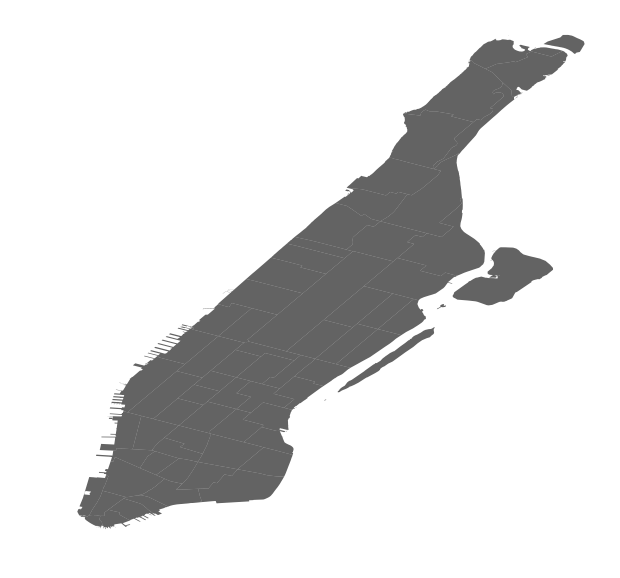

In [48]:
f, ax = plt.subplots(figsize=(10,10))
dataMan.plot(figsize=(8,8), color='black', ax=ax, alpha=100)
ax.set_axis_off()

In [98]:
zips = gpd.read_file('ZIP_CODE_040114.shp')
zips.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [99]:
zips.shape

(263, 13)

In [100]:
zips['ZIPCODE'] = zips['ZIPCODE'].astype(int)
type(zips['ZIPCODE'].values[0])

numpy.int64

In [101]:
manZips = [10000+i for i in range(300)]
#manZips.remove(10026)
#manZips.remove(10027)
#manZips.remove(10028)
#manZips.remove(10029)
#manZips.remove(10030)
#manZips.remove(10037)
#manZips.remove(10038)
len(manZips)

300

In [102]:
zips = zips[(zips['ZIPCODE'].isin(manZips))]
zips.shape

(110, 13)

In [106]:
f, ax = plt.subplots(figsize=(8,8))
zips.plot(figsize=(8,8), color='black', ax=ax, alpha=100)
rest.plot(ax=ax, color='yellow')
ax.set_axis_off()

ValueError: Image size of 451769x477 pixels is too large. It must be less than 2^16 in each direction.

In [107]:
rest1.crs

AttributeError: 'DataFrame' object has no attribute 'crs'

In [108]:
zips.to_crs(epsg=4326, inplace=True)

In [109]:
zips.crs

{'init': 'epsg:4326', 'no_defs': True}

In [110]:
rest1 = rest.to_crs(epsg=2263)
zips1 = zips.to_crs(epsg=2263)

AttributeError: 'DataFrame' object has no attribute 'to_crs'

In [111]:
print(dataMan.crs, rest.crs)

AttributeError: 'DataFrame' object has no attribute 'crs'

In [112]:
dataMan1 = dataMan.to_crs(epsg=2263)

In [115]:
restNight = gpd.sjoin(rest1, dataMan).groupby(by='PULocationID').count()

AttributeError: 'DataFrame' object has no attribute 'crs'

In [114]:
restNight.head()

,restaurant_name,restaurant_location_state,restaurant_location_zip_code,restaurant_location_city,restaurant_coordinates_latitude,restaurant_coordinates_longitude,restaurant_rating,restaurant_price,lonlat,geometry,index_right,Shape_Leng,Shape_Area,coords,PUTime,PULocationID
0,9,9,9,9,9,9,9,8,9,9,9,9,9,9,9,4
1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,13
2,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,24
3,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,41
4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,42


In [65]:
restNight['PULocationID'] = restNight.index
restNight.reset_index(drop=True, inplace=True)
restNight.head()

,restaurant_name,restaurant_location_state,restaurant_location_zip_code,restaurant_location_city,restaurant_coordinates_latitude,restaurant_coordinates_longitude,restaurant_rating,restaurant_price,lonlat,geometry,index_right,Shape_Leng,Shape_Area,coords,PUTime,PULocationID
0,9,9,9,9,9,9,9,8,9,9,9,9,9,9,9,4
1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,13
2,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,24
3,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,41
4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,42


In [66]:
dataMan = dataMan.merge(restNight, on='PULocationID')
dataMan.head()

,PULocationID,Shape_Leng_x,Shape_Area_x,geometry_x,coords_x,PUTime_x,restaurant_name,restaurant_location_state,restaurant_location_zip_code,restaurant_location_city,...,restaurant_coordinates_longitude,restaurant_rating,restaurant_price,lonlat,geometry_y,index_right,Shape_Leng_y,Shape_Area_y,coords_y,PUTime_y
0,4,0.043567,0.000112,"POLYGON ((992073.4667968601 203714.0759887695,...","(990618.795051066, 203105.53231811523)",7639,9,9,9,9,...,9,9,8,9,9,9,9,9,9,9
1,13,0.050281,0.000149,"POLYGON ((980801.3095727563 201248.8694928288,...","(979781.1033032676, 198536.38051874936)",18397,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2,24,0.047000,0.000061,"POLYGON ((995453.1139255464 230274.2667761594,...","(993782.5747503315, 231481.0488781333)",5445,5,5,5,5,...,5,5,4,5,5,5,5,5,5,5
3,41,0.052793,0.000143,"POLYGON ((998716.9128961712 234240.3971749842,...","(997520.5888832721, 232274.16256850213)",10257,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
4,42,0.092709,0.000264,"POLYGON ((1002413.191381723 243934.560382843, ...","(1000990.4714998403, 238412.2291259691)",4567,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [67]:
dataMan.columns

Index(['PULocationID', 'Shape_Leng_x', 'Shape_Area_x', 'geometry_x',
       'coords_x', 'PUTime_x', 'restaurant_name', 'restaurant_location_state',
       'restaurant_location_zip_code', 'restaurant_location_city',
       'restaurant_coordinates_latitude', 'restaurant_coordinates_longitude',
       'restaurant_rating', 'restaurant_price', 'lonlat', 'geometry_y',
       'index_right', 'Shape_Leng_y', 'Shape_Area_y', 'coords_y', 'PUTime_y'],
      dtype='object')

In [68]:
dataMan = dataMan[['PULocationID', 'geometry_x', 'coords_x', 'PUTime_x',
                   'restaurant_name']]
dataMan.head()

,PULocationID,geometry_x,coords_x,PUTime_x,restaurant_name
0,4,"POLYGON ((992073.4667968601 203714.0759887695,...","(990618.795051066, 203105.53231811523)",7639,9
1,13,"POLYGON ((980801.3095727563 201248.8694928288,...","(979781.1033032676, 198536.38051874936)",18397,5
2,24,"POLYGON ((995453.1139255464 230274.2667761594,...","(993782.5747503315, 231481.0488781333)",5445,5
3,41,"POLYGON ((998716.9128961712 234240.3971749842,...","(997520.5888832721, 232274.16256850213)",10257,10
4,42,"POLYGON ((1002413.191381723 243934.560382843, ...","(1000990.4714998403, 238412.2291259691)",4567,4


In [69]:
dataMan.rename(columns={'geometry_x':'geometry', 'coords_x':'coords', 
                    'PUTime_x':'Pickups', 'restaurant_name':'Restaurants'}, inplace=True)
dataMan.head()

,PULocationID,geometry,coords,Pickups,Restaurants
0,4,"POLYGON ((992073.4667968601 203714.0759887695,...","(990618.795051066, 203105.53231811523)",7639,9
1,13,"POLYGON ((980801.3095727563 201248.8694928288,...","(979781.1033032676, 198536.38051874936)",18397,5
2,24,"POLYGON ((995453.1139255464 230274.2667761594,...","(993782.5747503315, 231481.0488781333)",5445,5
3,41,"POLYGON ((998716.9128961712 234240.3971749842,...","(997520.5888832721, 232274.16256850213)",10257,10
4,42,"POLYGON ((1002413.191381723 243934.560382843, ...","(1000990.4714998403, 238412.2291259691)",4567,4


In [70]:
type(dataMan)

pandas.core.frame.DataFrame

In [71]:
crs = {'init': 'epsg:4326'}
dataMan = gpd.GeoDataFrame(dataMan, crs=crs, geometry='geometry')

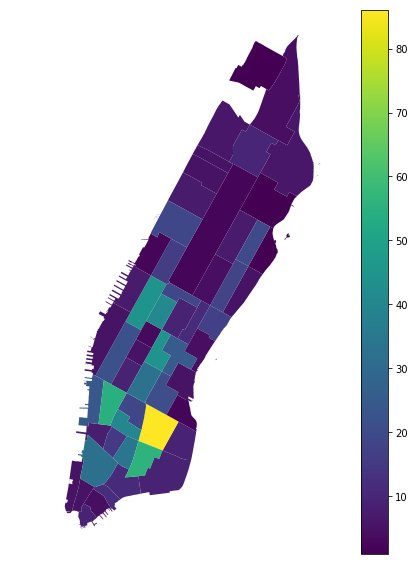

In [72]:
ax = dataMan.plot(column='Restaurants', figsize=(10,10), k=10, legend=True)
ax.set_axis_off()